<a href="https://colab.research.google.com/github/angelohafner/linguagem-de-programacao-udesc/blob/main/resposta_pressao_em_funcao_do_raio_poco_de_petroleo_cilindrico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEMA: Pressão radial em regime permanente em reservatórios de petróleo

## 1) MODELO (equação diferencial)
Considere escoamento radial, monofásico, incompressível, isotérmico, em meio poroso homogêneo e isotrópico, sob regime permanente.  
Mostre que o campo de pressões $p(r)$ satisfaz a EDO de 2ª ordem em coordenadas cilíndricas (simetria radial):

$$
\frac{1}{r}\frac{d}{dr}\!\left(r\,\frac{dp}{dr}\right)=0,\quad r\in[r_w,r_e].
$$

Adote as condições de contorno de Dirichlet:

$$
p(r_w)=p_{w},\qquad p(r_e)=p_e,
$$

onde $r_w$ é o raio do poço e $r_e$ o raio de drenagem.

---

### TAREFA 1 (derivação curta)
- Escreva, em no máximo 8 linhas, a dedução a partir da conservação de massa + Lei de Darcy em coordenadas cilíndricas, até chegar à EDO acima.  
- Apresente a **solução geral** e a **forma final de $p(r)$** impondo as duas condições de contorno.

---

## 2) PARÂMETROS (use SI)
- $r_w = 0.10\ \text{m}$  
- $r_e = 300\ \text{m}$  
- $p_e = 25.0\ \text{MPa}$  
- $p_{w} = 10.0\ \text{MPa}$  

---

## 3) TAREFA 2 (gráfico em Python)
- Gere um vetor de raios `r` (100 pontos, espaçado logaritmicamente entre $r_w$ e $r_e$).  
- Calcule $p(r)$ usando sua solução.  
- Plote $p(r)$ × $r$ (eixo x em escala logarítmica, $r$ em m, $p$ em MPa).  
- Inclua rótulos, grade e título.  
- Salve a figura em 300 dpi como **"pressao_radial.png"**.  
- Comentários do código em inglês.

---



# Pressão radial em regime permanente — dedução detalhada

## Hipóteses
- Escoamento monofásico, incompressível, isotérmico.  
- Meio poroso homogêneo e isotrópico ($k$ constante).  
- Regime permanente e simetria radial (variáveis só de $r$).  
- Espessura do reservatório: $h$.
- Poço de raio $r_w$, fronteira externa $r_e$.  
- Condições de contorno: $p(r_w)=p_{w}$ e $p(r_e)=p_e$.

---

## 1) Conservação de massa + Darcy em cilíndricas
Para fluido incompressível em regime permanente:

$$
\nabla\!\cdot \mathbf{v} = 0
$$

Com simetria radial (\(\partial/\partial\theta = \partial/\partial z = 0\)) em coordenadas cilíndricas:

$$
\frac{1}{r}\frac{d}{dr}\big(r\,v_r\big)=0 \;\;\Rightarrow\;\; r\,v_r = \text{constante}
$$

Lei de Darcy (direção radial):

$$
v_r = -\frac{k}{\mu}\,\frac{dp}{dr}
$$

Substituindo Darcy na continuidade:

$$
\frac{1}{r}\frac{d}{dr}\!\left(r\,\left[-\frac{k}{\mu}\frac{dp}{dr}\right]\right)=0
\;\;\Rightarrow\;\;
\boxed{\frac{1}{r}\frac{d}{dr}\!\left(r\,\frac{dp}{dr}\right)=0}
$$

(assumindo \(k/\mu\) constante).

---

## 2) Integração da EDO (usando **A** e **B**)
Integre uma vez:

$$
\frac{d}{dr}\!\left(r\,\frac{dp}{dr}\right)=0
\;\Rightarrow\;
r\,\frac{dp}{dr} = A
\;\Rightarrow\;
\frac{dp}{dr} = \frac{A}{r}
$$

Integre novamente:

$$
p(r) = A\ln r + B
$$

---

## 3) Determinação de **A** e **B** pelas C.C.
Use $p(r_w)=p_{w}$ e $p(r_e)=p_e$:

$$
\begin{cases}
p_{w} = A\ln r_w + B,\\[4pt]
p_{e}  = A\ln r_e + B
\end{cases}
$$

Subtraindo:

$$
p_e - p_{w} = A\,\ln\!\left(\frac{r_e}{r_w}\right)
\;\Rightarrow\;
\boxed{A = \dfrac{p_e - p_{w}}{\ln\!\left(\dfrac{r_e}{r_w}\right)}}
$$

De \(p_{w} = A\ln r_w + B\):

$$
\boxed{B = p_{w} - A\ln r_w}
$$

---

## 4) Expressão final \(p(r)\) (em termos das pressões de contorno)
Substitua \(A\) e \(B\) em \(p(r)=A\ln r + B\):

$$
\boxed{
p(r) = p_e - \frac{p_e - p_{w}}{\ln\!\left(\dfrac{r_e}{r_w}\right)}
\,\ln\!\left(\dfrac{r_e}{r}\right)
}
$$

---

## 5) Forma alternativa (em termos da vazão \(q\))
Pela forma integral de Darcy no cilindro:

$$
q = -\,2\pi r h\,\frac{k}{\mu}\,\frac{dp}{dr}
\;\Rightarrow\;
\frac{dp}{dr} = -\,\frac{\mu q}{2\pi k h}\,\frac{1}{r}
\;\Rightarrow\;
p(r) = -\frac{\mu q}{2\pi k h}\ln r + B
$$

Impondo \(p(r_w)=p_{w}\) e \(p(r_e)=p_e\):

$$
\boxed{
p(r) = p_e - \frac{\mu q}{2\pi k h}\,
\ln\!\left(\frac{r}{r_e}\right)
}
\quad\text{e}\quad
\boxed{
q = \frac{2\pi k h}{\mu}\,
\frac{p_e - p_{w}}{\ln\!\left(\dfrac{r_e}{r_w}\right)}
}
$$


A = 1.8735 MPa
B = 14.3139 MPa


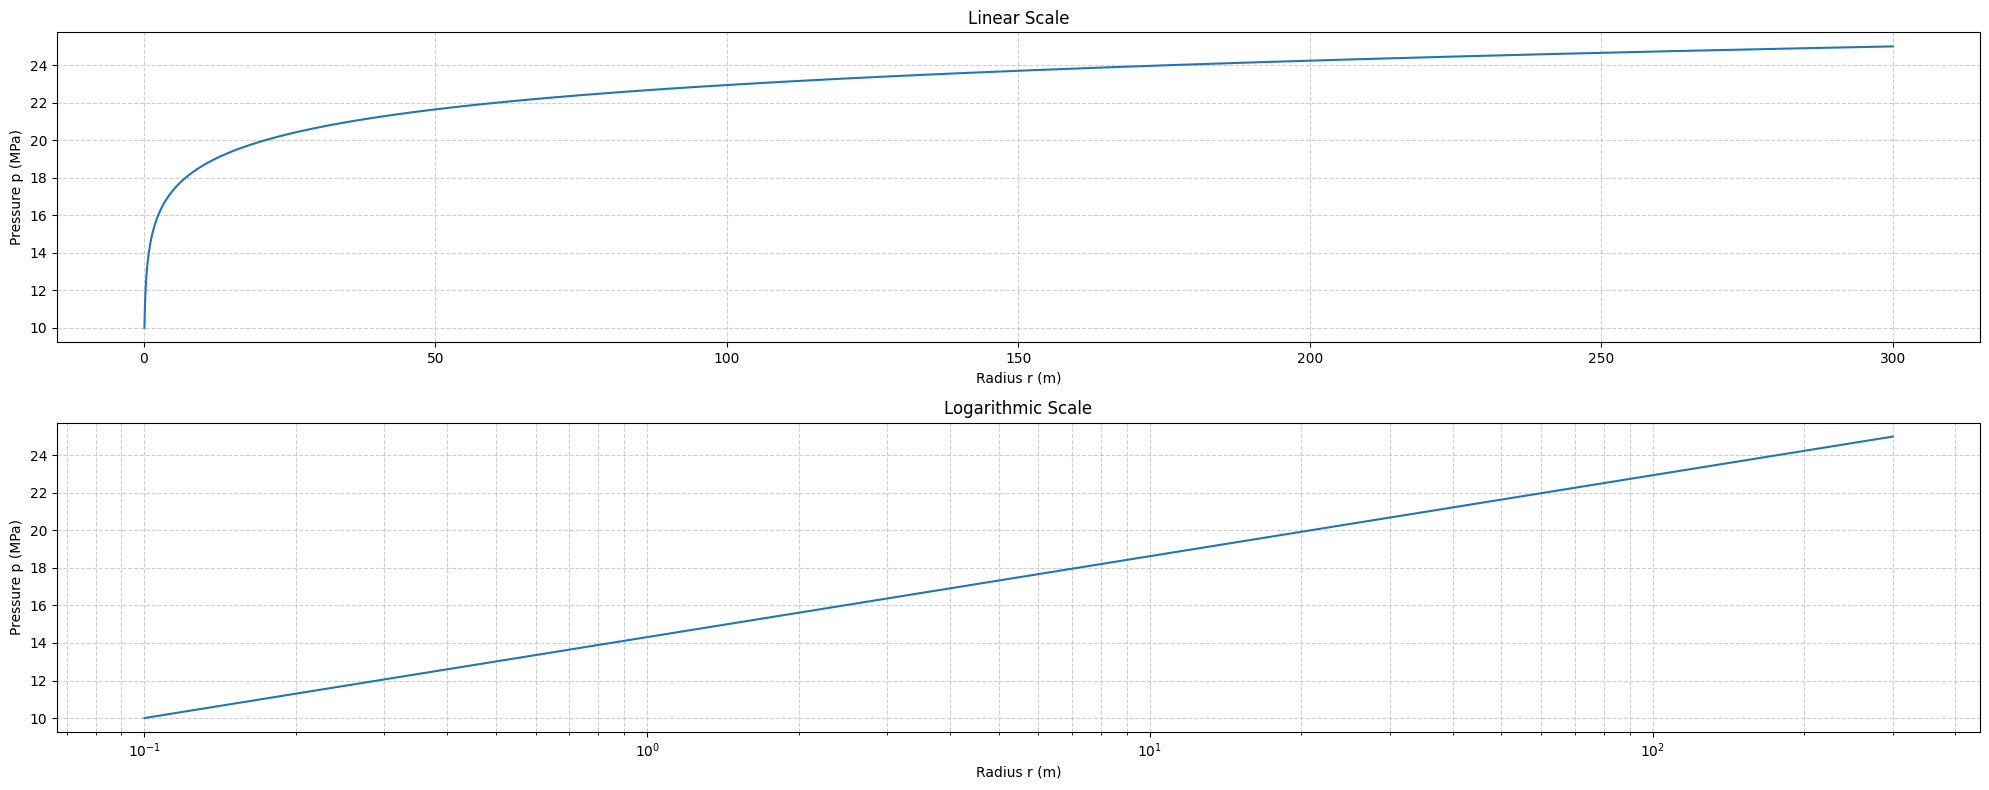

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def compute_A(pe, pw, re, rw):
    """
    Compute constant A for radial steady-state flow in a reservoir.

    Parameters:
        pe (float): External boundary pressure [Pa or MPa]
        pw (float): Wellbore pressure [Pa or MPa]
        re (float): External radius [m]
        rw (float): Wellbore radius [m]

    Returns:
        float: Constant A in the analytical solution p(r) = A*ln(r) + B
    """
    A = (pe - pw) / np.log(re / rw)
    return A

# Example usage:
pe = 25.0   # MPa
pw = 10.0   # MPa
re = 300.0  # m
rw = 0.10   # m

A = compute_A(pe, pw, re, rw)
B = pe - A * np.log(re)
print(f"A = {A:.4f} MPa")
print(f"B = {B:.4f} MPa")

r = np.linspace(rw, re, 10000)
p = A * np.log(r) + B

# Cria figura com 2 subplots (um embaixo do outro)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))

# Gráfico 1 — escala linear
ax1.plot(r, p)
ax1.set_xlabel("Radius r (m)")
ax1.set_ylabel("Pressure p (MPa)")
ax1.set_title("Linear Scale")
ax1.grid(True, which="both", ls="--", alpha=0.6)

# Gráfico 2 — escala logarítmica
ax2.semilogx(r, p)
ax2.set_xlabel("Radius r (m)")
ax2.set_ylabel("Pressure p (MPa)")
ax2.set_title("Logarithmic Scale")
ax2.grid(True, which="both", ls="--", alpha=0.6)

plt.tight_layout()
plt.savefig("pressao_radial_dupla.png", dpi=300)
plt.show()
